In [1]:
11505/60**2

3.1958333333333333

In [1]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

with open("./data/cont_data.pickle", "rb") as f:
    d = pickle.load(f)

In [2]:
print(d["res_s1"]["9.0;10.0"], d["res_s2"]["9.0;10.0"] )
print(sum(d["res_s1"]["9.0;10.0"]), sum(d["res_s2"]["9.0;10.0"]))
print(d["res_p1"]["9.0;10.0"], d["res_p2"]["9.0;10.0"] )
print(sum(d["res_p1"]["9.0;10.0"]), sum(d["res_p2"]["9.0;10.0"]))


[9.98834092739027, 10.0, 10.0, 10.0, 10.0, 0.0] [10.0, 9.999268251795934, 9.995888671453617, 9.195067371697913, 10.0, 0.0]
49.98834092739027 49.19022429494746
[0.0, 9.0, 10.0, 10.0, 10.0, 10.0] [0.0, 10.0, 10.0, 10.0, 10.0, 10.0]
49.0 50.0


In [3]:
49.98834092739027 + 49.19022429494746

99.17856522233774

In [4]:
x = np.linspace(9, 10, 41)
y = np.linspace(10, 11, 41)
X, Y = np.meshgrid(x, y)
t = 0
tank = "res_s1"

def compute_M(t, tank):
    M = np.zeros((41,41))
    for i in range(x.shape[0]):
        for j in range(y.shape[0]):
            M[i][j] = d[tank][f"{x[i]};{y[j]}"][t]
    return(M)

p1_1 = 9, p2_1 = 10 ->      s1_0 = 9, s2_0 = 10
p1_1 = 9.5, p2_1 = 10 ->    s1_0 = 9.5, s2_0 = 10
p1_1 = 10, p2_1 = 10 ->     s1_0 = 10, s2_0 = 10

p1_1 = 9, p2_1 = 10.5 ->    s1_0 = 9.5, s2_0 = 10
p1_1 = 9.5, p2_1 = 10.5 ->  s1_0 = 10, s2_0 = 10
p1_1 = 10, p2_1 = 10.5 ->   s1_0 = 10, s2_0 = 10

p1_1 = 9, p2_1 = 11 ->      s1_0 = 10, s2_0 = 10
p1_1 = 9.5, p2_1 = 11 ->    s1_0 = 10, s2_0 = 10
p1_1 = 10, p2_1 = 11 ->     s1_0 = 10, s2_0 = 10

In [11]:
d["res_p2"]["9.1;10.0"]

[0.0, 10.0, 10.0, 10.0, 10.0, 10.0]

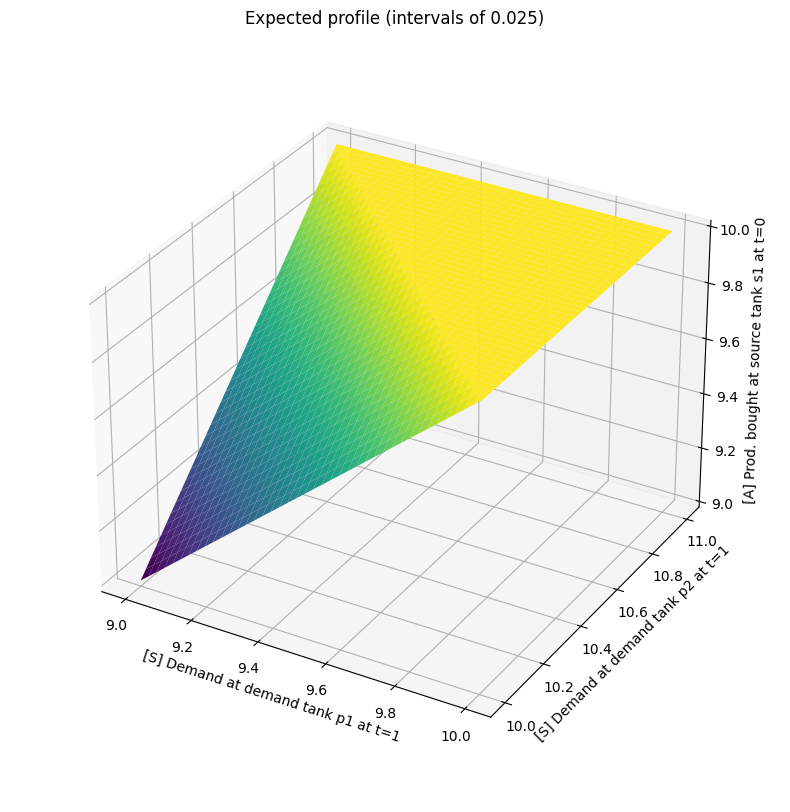

In [5]:
z_exp_s1 = np.zeros((41,41))
z_exp_s2 = 10*np.ones((41,41))
for i in range(x.shape[0]):
    for j in range(y.shape[0]):
        z_exp_s1[i][j] = min(10, x[i] + y[j] - 10)
# z_exp_s1 = np.array([[9, 9.5, 10], [9.5, 10, 10], [10, 10, 10]])
# z_exp_s2 = np.array([[10, 10, 10], [10, 10, 10], [10, 10, 10]])
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X,Y, z_exp_s1, cmap='viridis')

# Add a color bar
# fig.colorbar(surf)
# Customize the plot
ax.set_title(f"Expected profile (intervals of 0.025)")
ax.set_xlabel('[S] Demand at demand tank p1 at t=1')
ax.set_ylabel('[S] Demand at demand tank p2 at t=1')
ax.set_zlabel(f'[A] Prod. bought at source tank s1 at t={t}')

ax.set_box_aspect(None, zoom=0.9)
plt.show()

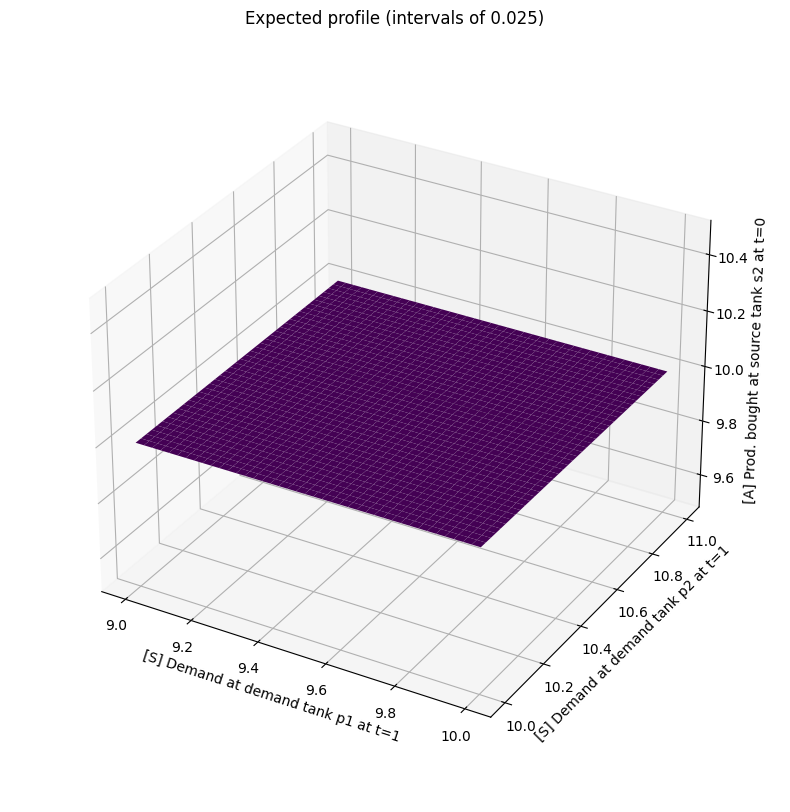

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X,Y, z_exp_s2, cmap='viridis')

# Add a color bar
# fig.colorbar(surf)
# Customize the plot
ax.set_title(f"Expected profile (intervals of 0.025)")
ax.set_xlabel('[S] Demand at demand tank p1 at t=1')
ax.set_ylabel('[S] Demand at demand tank p2 at t=1')
ax.set_zlabel(f'[A] Prod. bought at source tank s2 at t={t}')

ax.set_box_aspect(None, zoom=0.9)
plt.show()

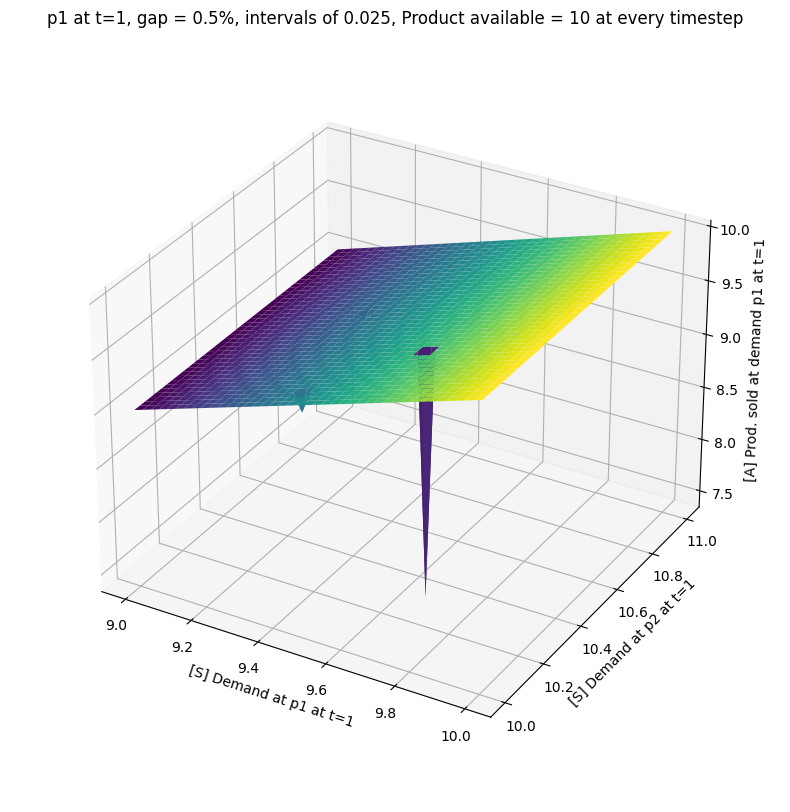

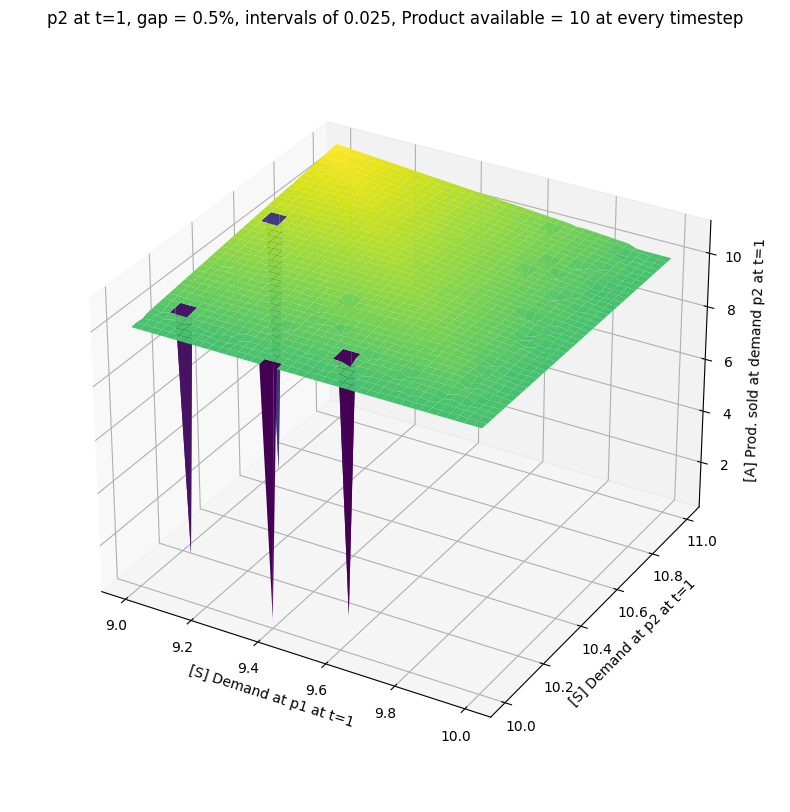

In [34]:
# Create a 3D surface plot
t=1
for tank in ["res_p1", "res_p2"]:
    
    if "flow" in tank:
        tank1, tank2 = tank[-5:-3], tank[-2:]
    else:
        tank_name = tank[-2:]
    
    M = compute_M(t, tank)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, M.T, cmap='viridis')

    # Add a color bar
    # fig.colorbar(surf)
    # Customize the plot
    if "flow" in tank:
        ax.set_title(f"{tank1} to {tank2} at t={t}, gap = 0.5%, intervals of 0.025, Product available = 10 at every timestep")
    else:
        ax.set_title(f"{tank_name} at t={t}, gap = 0.5%, intervals of 0.025, Product available = 10 at every timestep")
        
    ax.set_xlabel('[S] Demand at p1 at t=1')
    ax.set_ylabel('[S] Demand at p2 at t=1')
    if tank_name[0] == "s":
        ax.set_zlabel(f'[A] Prod. bought at source {tank_name} at t={t}')
    elif tank_name[0] == "p":
        ax.set_zlabel(f'[A] Prod. sold at demand {tank_name} at t={t}')
    
    elif tank_name[0] == "j":
        ax.set_zlabel(f'[A] Flow from {tank1} to {tank2} at t={t}')

    ax.set_box_aspect(None, zoom=0.9)
    plt.show()

In [31]:
M.T[0]

array([10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        ,  0.6       , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.00000073,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        , 10.        , 10.        , 10.        , 10.        ,
       10.        ])

In [32]:
M.T[40]

array([11.        , 10.975     , 10.95      , 10.925     , 10.9       ,
       10.875     , 10.85      , 10.82496595, 10.8       , 10.7749274 ,
       10.74999554, 10.725     , 10.7       , 10.675     , 10.64992648,
       10.625     , 10.6       , 10.57499416, 10.55      , 10.52496521,
       10.5       , 10.475     , 10.45      , 10.425     , 10.4       ,
       10.375     , 10.35      , 10.32499649, 10.3       , 10.24150666,
       10.25      , 10.225     , 10.2       , 10.17497393, 10.15      ,
       10.125     , 10.00940957, 10.        , 10.        ,  9.99910066,
       10.        ])

In [17]:
M[0][-1]

9.0

In [15]:
M[:, 1]

array([ 9.        ,  9.025     ,  9.05      ,  9.075     ,  9.1       ,
        9.125     ,  9.15      ,  9.175     ,  9.2       ,  9.225     ,
        9.25      ,  9.275     ,  9.3       ,  9.325     ,  9.35      ,
        9.375     ,  9.4       ,  9.42500033,  9.45      ,  9.475     ,
        9.5       ,  9.525     ,  9.55      ,  9.575     ,  9.6       ,
        9.625     ,  9.64968153,  9.675     ,  9.7       ,  9.725     ,
        9.75      ,  9.775     ,  9.8       ,  9.825     ,  9.85      ,
        9.875     ,  9.9       ,  9.925     ,  9.95      ,  9.975     ,
       10.        ])

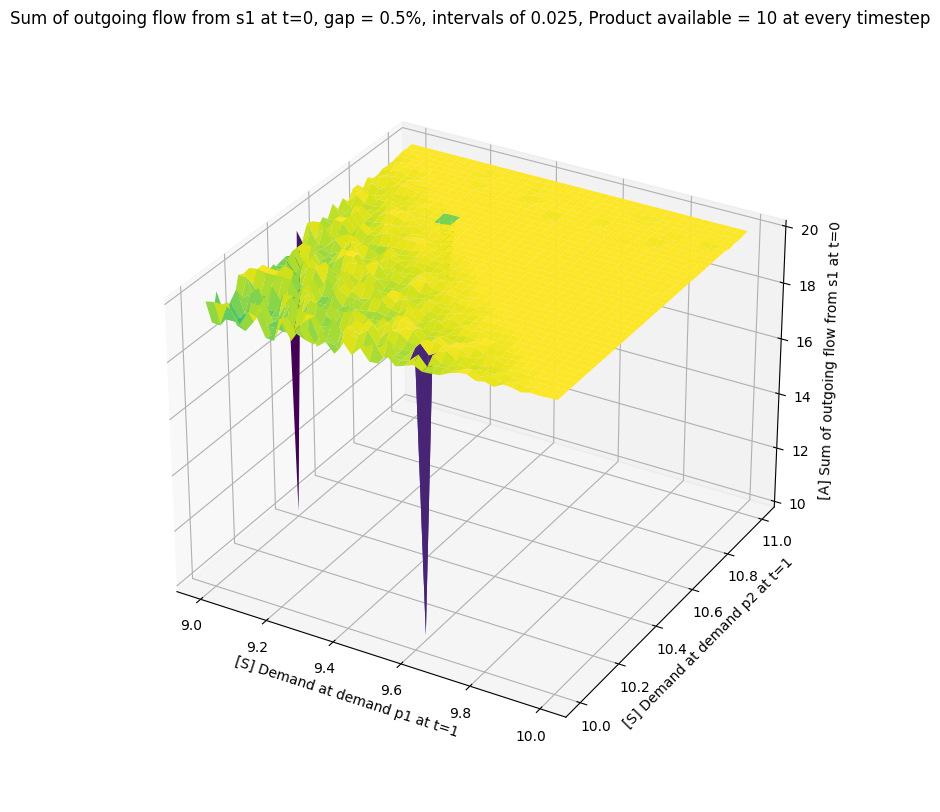

In [19]:
# Create a 3D surface plot
M = np.zeros((41,41))
t=0
for tank in ["res_flow_s1_j1", "res_flow_s1_j2", "res_flow_s1_j3", "res_flow_s1_j4", 
             "res_flow_s2_j1", "res_flow_s2_j2", "res_flow_s2_j3", "res_flow_s2_j4"]:
    
    M += compute_M(t, tank)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, M, cmap='viridis')

# Add a color bar
# fig.colorbar(surf)
# Customize the plot
if "flow" in tank:
    ax.set_title(f"Sum of outgoing flow from s1 at t={t}, gap = 0.5%, intervals of 0.025, Product available = 10 at every timestep")
else:
    ax.set_title(f"{tank_name} at t={t}, gap = 0.5%, intervals of 0.025, Product available = 10 at every timestep")
    
ax.set_xlabel('[S] Demand at demand p1 at t=1')
ax.set_ylabel('[S] Demand at demand p2 at t=1')
ax.set_zlabel(f'[A] Sum of outgoing flow from s1 at t={t}')

ax.set_box_aspect(None, zoom=0.9)
plt.show()